# Improving the reliability of data storage systems project[1]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [2]:
file_path = 'project1_dataset.xlsx'
df = pd.read_excel(file_path)
df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)


In [3]:
column_mapping = {
    'r_5': 'r_5: Reallocated Sector Count',
    'n_5': 'n_5: Reallocated Sector Count',
    'r_183': 'r_183: SATA Downshift Error',
    'n_183': 'n_183: SATA Downshift Error',
    'r_184': 'r_184: End-to-End Errors',
    'n_184': 'n_184: End-to-End Errors',
    'r_187': 'r_187: Reported Uncorrectable Errors',
    'n_187': 'n_187: Reported Uncorrectable Errors',
    'r_195': 'r_195: Hardware ECC Recovered',
    'n_195': 'n_195: Hardware ECC Recovered',
    'r_197': 'r_197: Current Pending Sector Count',
    'n_197': 'n_197: Current Pending Sector Count',
    'r_199': 'r_199: Ultra DMA CRC Error Count',
    'n_199': 'n_199: Ultra DMA CRC Error Count',
    'r_171': 'r_171: Program Failed Count',
    'n_171': 'n_171: Program Failed Count',
    'r_172': 'r_172: Erase Failed Count',
    'n_172': 'n_172: Erase Failed Count',
    'n_170': 'n_170: Available Reserved Blocks',
    'n_233': 'n_233: Media Wearout Indicator',
    'r_241': 'r_241: Number of Blocks Written',
    'n_241': 'n_241: Number of Blocks Written',
    'r_242': 'r_242: Number of Blocks Read',
    'n_242': 'n_242: Number of Blocks Read',
    'r_9': 'r_9: Power on Hours',
    'n_9': 'n_9: Power on Hours',
    'r_12': 'r_12: Power Cycle Count',
    'n_12': 'n_12: Power Cycle Count',
    'r_174': 'r_174: Unexpected Power Loss Count',
    'n_174': 'n_174: Unexpected Power Loss Count',
    'failure': 'failure'
}
df.rename(columns=column_mapping, inplace=True)

In [4]:
df.head()

,r_5: Reallocated Sector Count,n_5: Reallocated Sector Count,r_183: SATA Downshift Error,n_183: SATA Downshift Error,r_184: End-to-End Errors,n_184: End-to-End Errors,r_187: Reported Uncorrectable Errors,n_187: Reported Uncorrectable Errors,r_195: Hardware ECC Recovered,n_195: Hardware ECC Recovered,...,n_241: Number of Blocks Written,r_242: Number of Blocks Read,n_242: Number of Blocks Read,r_9: Power on Hours,n_9: Power on Hours,r_12: Power Cycle Count,n_12: Power Cycle Count,r_174: Unexpected Power Loss Count,n_174: Unexpected Power Loss Count,failure
0,0.0,100.0,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.674183,71.785470,...,100.000000,1.995498e-05,100.000000,0.332267,100.000000,0.011169,100.000000,0.020628,100,1
1,0.0,100.0,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,49.748744,...,94.913689,4.955898e-01,97.383575,0.219737,100.000000,0.013961,100.000000,0.027503,100,0
2,0.0,100.0,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,...,85.714286,4.955898e-01,97.383575,0.604700,91.919192,0.007818,98.989899,0.031625,100,0
3,0.0,96.0,0.001083,99.979577,0.000224,99.996411,0.000707,99.999279,0.674183,71.785470,...,94.913689,4.955898e-01,97.383575,0.752542,100.000000,0.018285,99.753151,0.031625,100,0
4,0.0,100.0,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.674183,71.785470,...,100.000000,2.128525e-07,100.000000,0.714754,100.000000,0.006143,100.000000,0.006876,100,0


In [5]:
print("Shape of Data:")
print(df.shape)
print("\nColumns names:")
print(df.columns)
print("\nEach column data type:")
print(df.dtypes)

Shape of Data:
(4999, 31)

Columns names:
Index(['r_5: Reallocated Sector Count', 'n_5: Reallocated Sector Count',
       'r_183: SATA Downshift Error', 'n_183: SATA Downshift Error',
       'r_184: End-to-End Errors', 'n_184: End-to-End Errors',
       'r_187: Reported Uncorrectable Errors',
       'n_187: Reported Uncorrectable Errors', 'r_195: Hardware ECC Recovered',
       'n_195: Hardware ECC Recovered', 'r_197: Current Pending Sector Count',
       'n_197: Current Pending Sector Count',
       'r_199: Ultra DMA CRC Error Count', 'n_199: Ultra DMA CRC Error Count',
       'r_171: Program Failed Count', 'n_171: Program Failed Count',
       'r_172: Erase Failed Count', 'n_172: Erase Failed Count',
       'n_170: Available Reserved Blocks', 'n_233: Media Wearout Indicator',
       'r_241: Number of Blocks Written', 'n_241: Number of Blocks Written',
       'r_242: Number of Blocks Read', 'n_242: Number of Blocks Read',
       'r_9: Power on Hours', 'n_9: Power on Hours', 'r_12: Pow

In [6]:
df = df.astype('float64', errors='ignore')
print(df.dtypes)

r_5: Reallocated Sector Count           float64
n_5: Reallocated Sector Count           float64
r_183: SATA Downshift Error             float64
n_183: SATA Downshift Error             float64
r_184: End-to-End Errors                float64
n_184: End-to-End Errors                float64
r_187: Reported Uncorrectable Errors    float64
n_187: Reported Uncorrectable Errors    float64
r_195: Hardware ECC Recovered           float64
n_195: Hardware ECC Recovered           float64
r_197: Current Pending Sector Count     float64
n_197: Current Pending Sector Count     float64
r_199: Ultra DMA CRC Error Count        float64
n_199: Ultra DMA CRC Error Count        float64
r_171: Program Failed Count             float64
n_171: Program Failed Count             float64
r_172: Erase Failed Count               float64
n_172: Erase Failed Count               float64
n_170: Available Reserved Blocks        float64
n_233: Media Wearout Indicator          float64
r_241: Number of Blocks Written         

In [7]:
df['failure'].value_counts()

failure
0.0    3999
1.0    1000
Name: count, dtype: int64

In [8]:
df.describe() 

,r_5: Reallocated Sector Count,n_5: Reallocated Sector Count,r_183: SATA Downshift Error,n_183: SATA Downshift Error,r_184: End-to-End Errors,n_184: End-to-End Errors,r_187: Reported Uncorrectable Errors,n_187: Reported Uncorrectable Errors,r_195: Hardware ECC Recovered,n_195: Hardware ECC Recovered,...,n_241: Number of Blocks Written,r_242: Number of Blocks Read,n_242: Number of Blocks Read,r_9: Power on Hours,n_9: Power on Hours,r_12: Power Cycle Count,n_12: Power Cycle Count,r_174: Unexpected Power Loss Count,n_174: Unexpected Power Loss Count,failure
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,...,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.0,4999.00000
mean,0.173383,99.526963,0.001189,99.852729,0.000008,99.992858,0.000910,99.995945,1.021716,76.804769,...,92.648612,0.702078,95.840262,0.434214,97.706830,0.017398,99.588058,0.032125,100.0,0.20004
std,1.962036,2.792436,0.022691,1.825500,0.000133,0.252677,0.032281,0.080722,5.301764,20.800966,...,6.269554,1.373174,4.789325,0.201771,3.053807,0.090940,0.502592,0.151743,0.0,0.40007
min,0.000000,0.000000,0.000000,0.000000,0.000000,83.838384,0.000000,95.959596,0.000000,0.000000,...,57.142857,0.000000,75.000000,0.000145,90.909091,0.000558,95.959596,0.000000,100.0,0.00000
25%,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,49.748744,...,85.714286,0.000039,97.383575,0.287339,93.939394,0.008377,98.989899,0.017190,100.0,0.00000
50%,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,71.785470,...,94.913689,0.495590,97.383575,0.469722,100.000000,0.011169,100.000000,0.031625,100.0,0.00000
75%,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.674183,100.000000,...,100.000000,0.495590,100.000000,0.602151,100.000000,0.015637,100.000000,0.031625,100.0,0.00000
max,47.977070,100.000000,0.797978,100.000000,0.008293,100.000000,1.863683,100.000000,91.747675,100.000000,...,100.000000,23.548387,100.000000,0.891171,100.000000,2.892804,100.000000,5.933854,100.0,1.00000


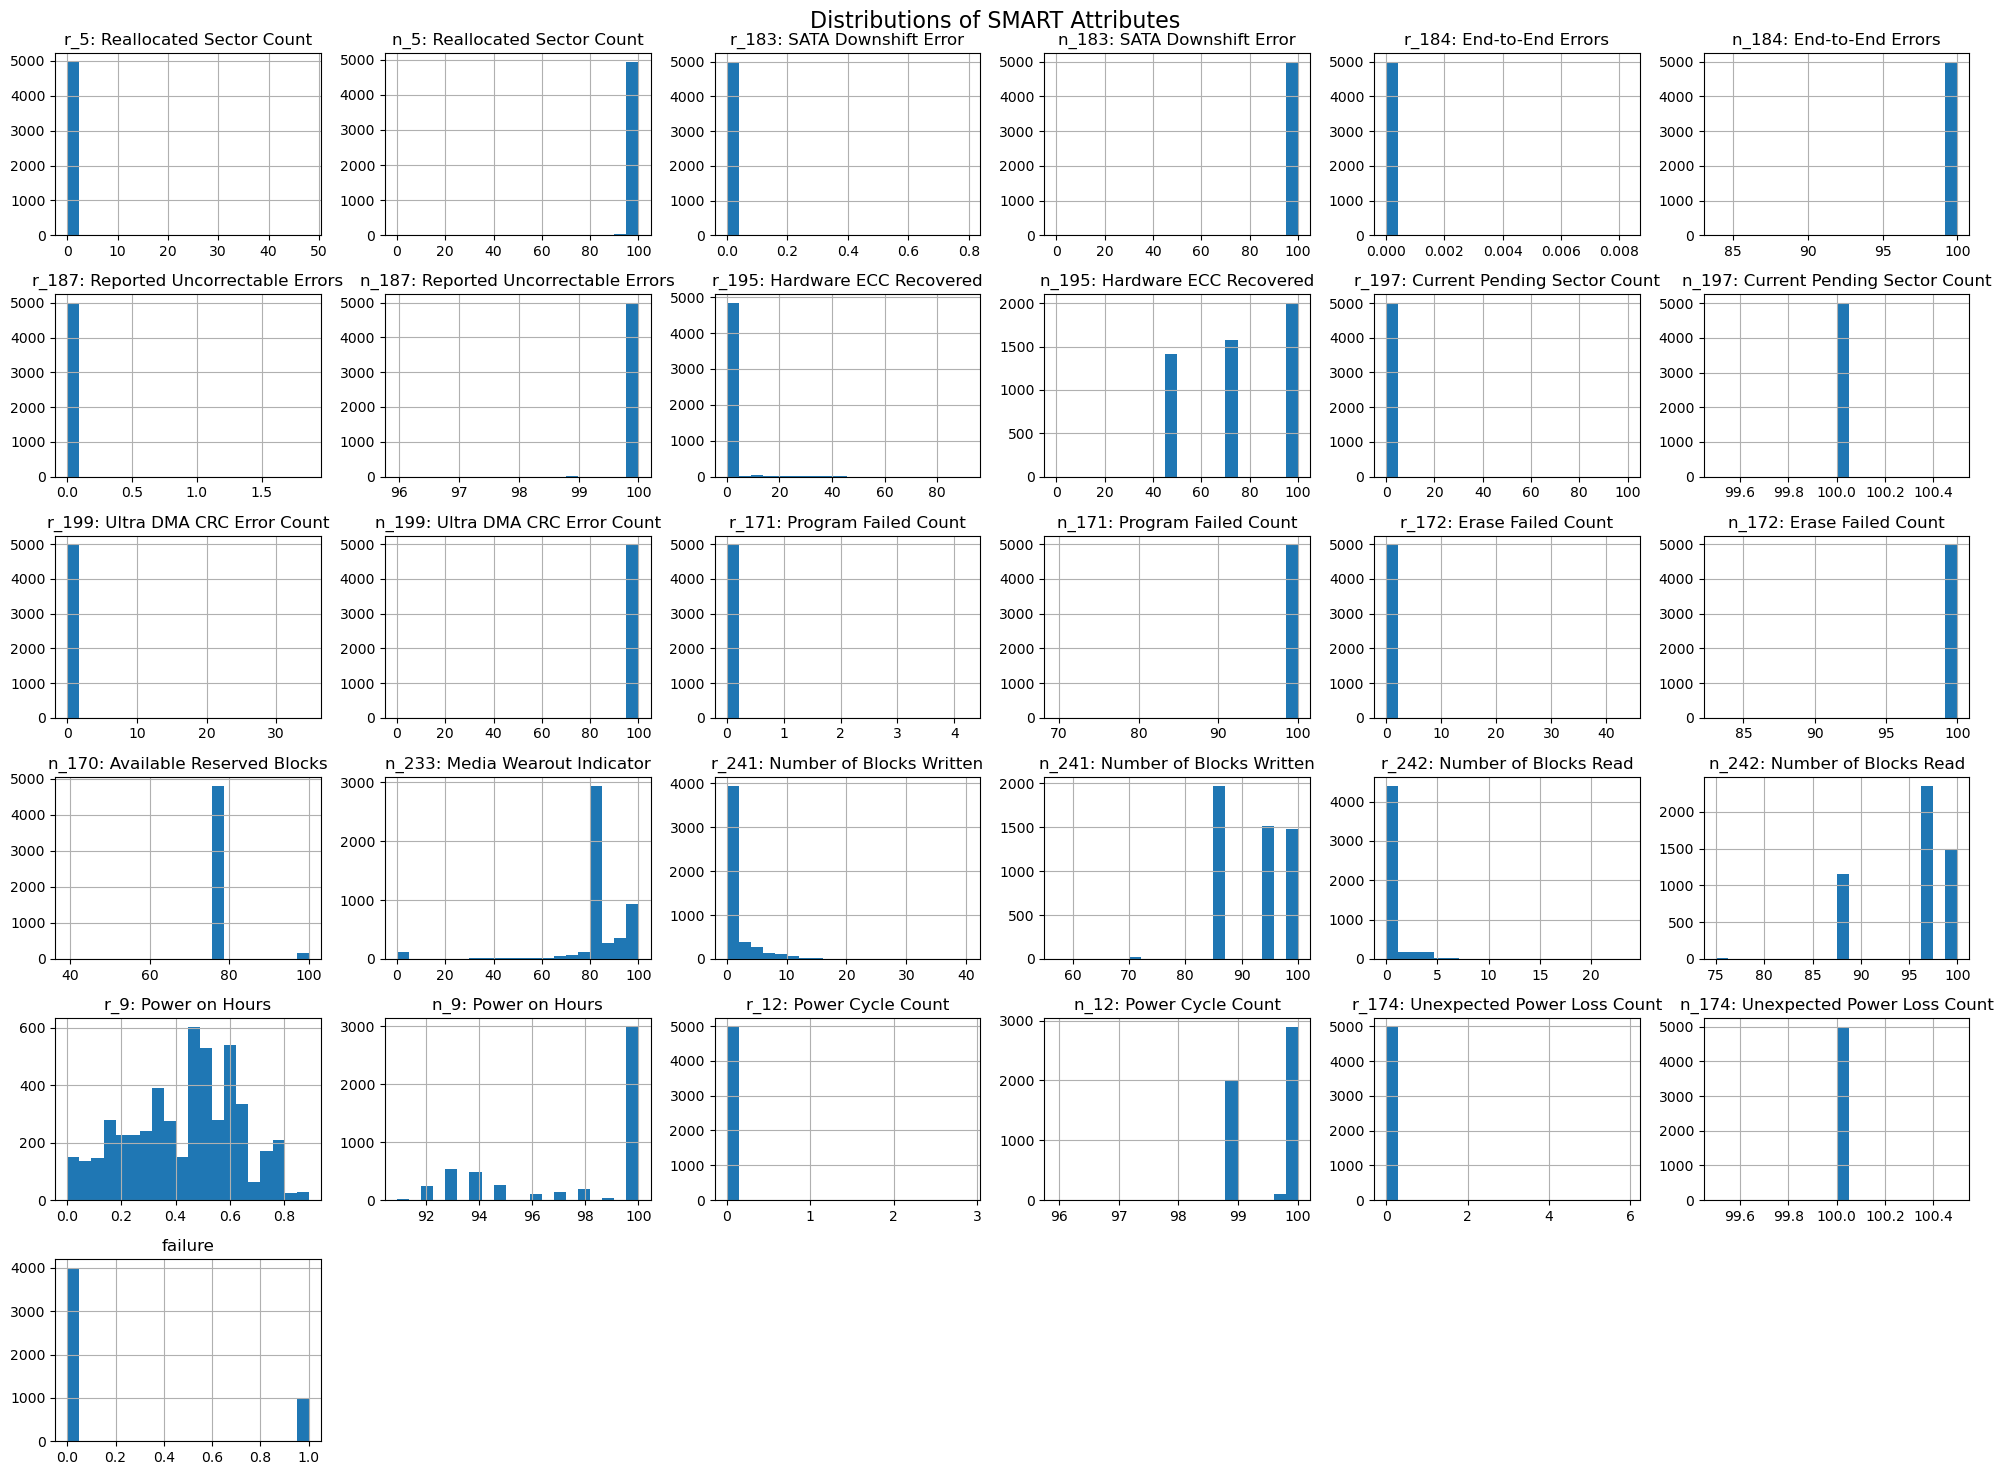

In [9]:
df.hist(bins=20, figsize=(20, 15), layout=(6, 6))
plt.suptitle("Distributions of SMART Attributes", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

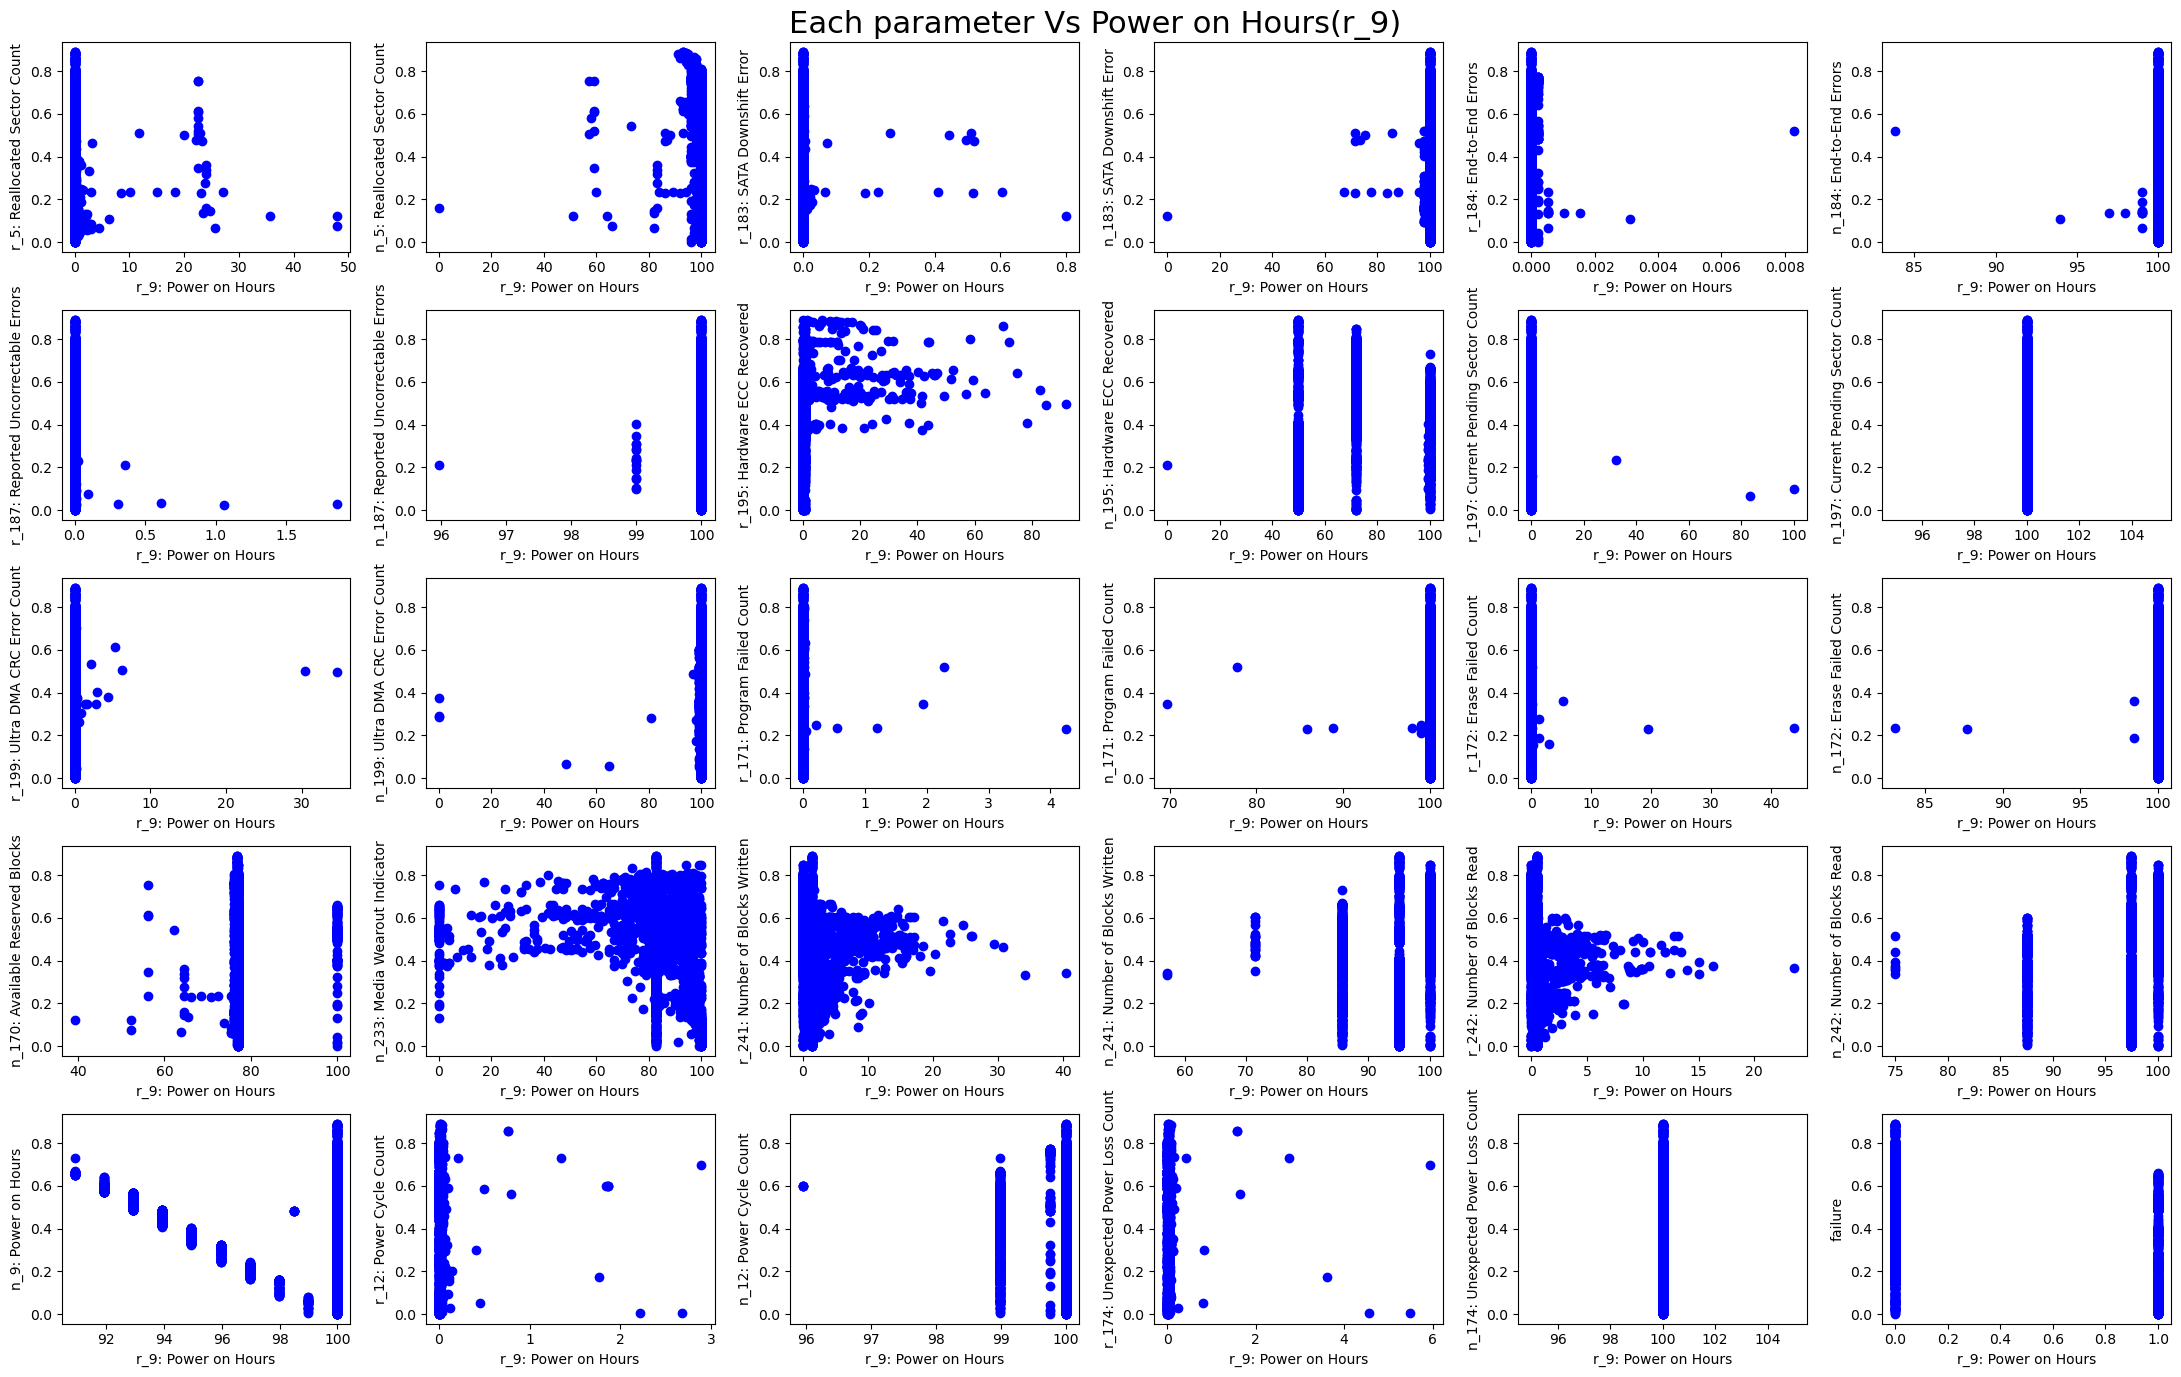

In [10]:
fig, axs = plt.subplots(5, 6, figsize=(22, 14))

columns = df.columns.drop('r_9: Power on Hours')
row, col = 0, 0

for column in columns:
    if col == 6:
        col = 0
        row += 1
    axs[row, col].scatter(df[column], df['r_9: Power on Hours'], color="blue")
    axs[row, col].set_ylabel(column)
    axs[row, col].set_xlabel('r_9: Power on Hours')
    col += 1

fig.suptitle("Each parameter Vs Power on Hours(r_9)", fontsize=22)

plt.tight_layout()
plt.show()

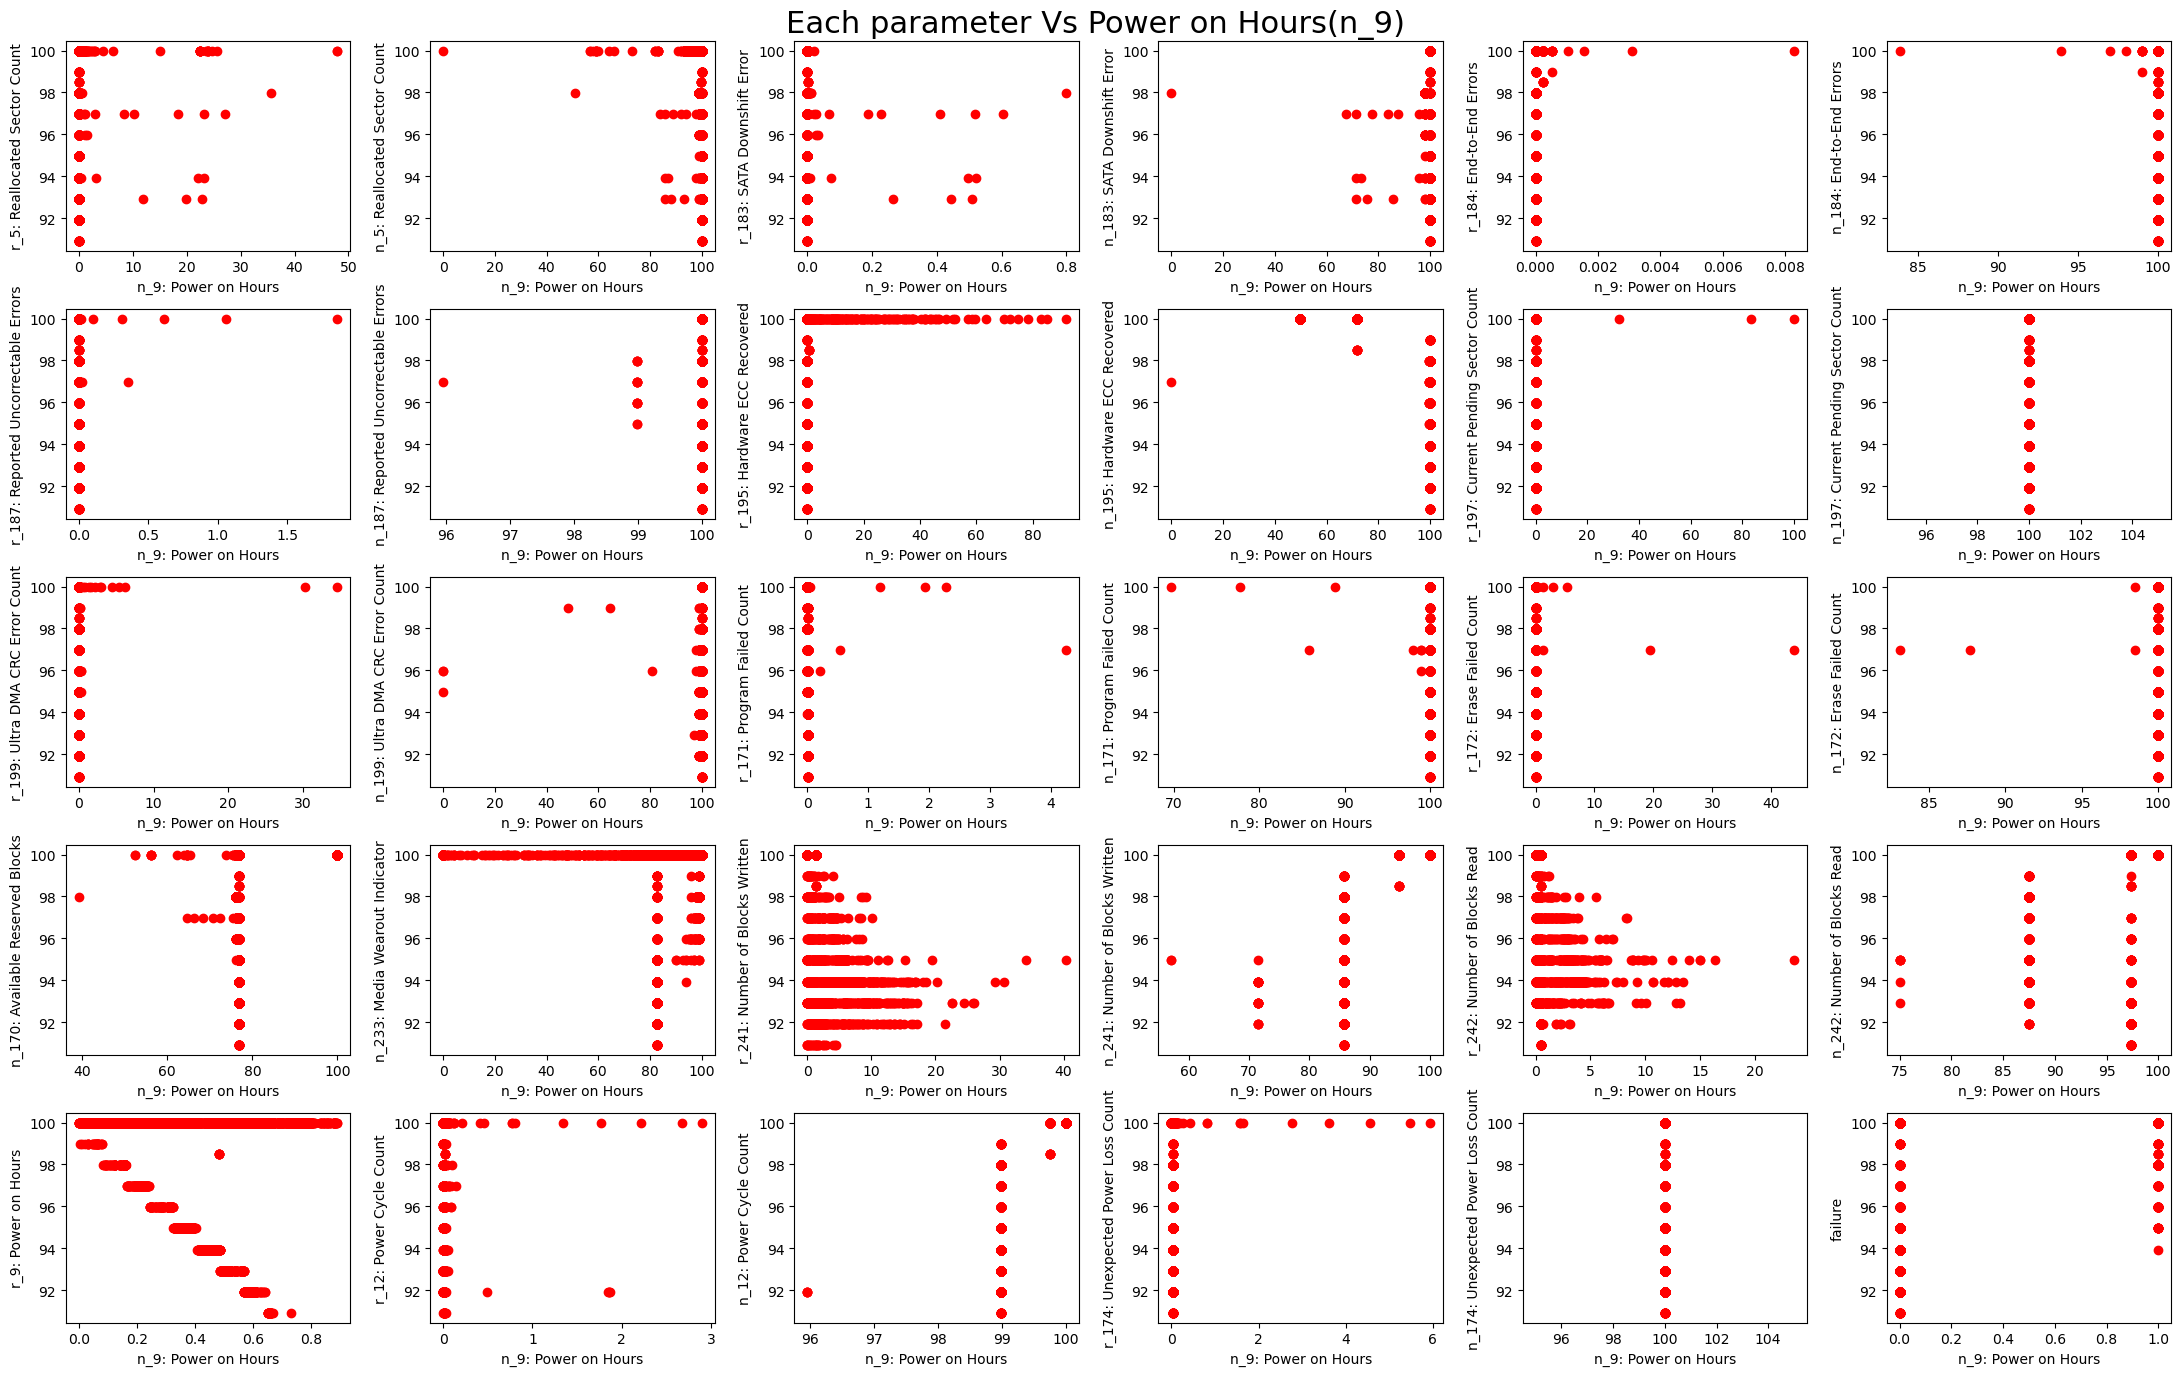

In [11]:
fig, axs = plt.subplots(5, 6, figsize=(22, 14))

columns = df.columns.drop('n_9: Power on Hours')
row, col = 0, 0

for column in columns:
    if col == 6:
        col = 0
        row += 1
    axs[row, col].scatter(df[column], df['n_9: Power on Hours'], color="red")
    axs[row, col].set_ylabel(column)
    axs[row, col].set_xlabel('n_9: Power on Hours')
    col += 1

fig.suptitle("Each parameter Vs Power on Hours(n_9)", fontsize=22)

plt.tight_layout()
plt.show()

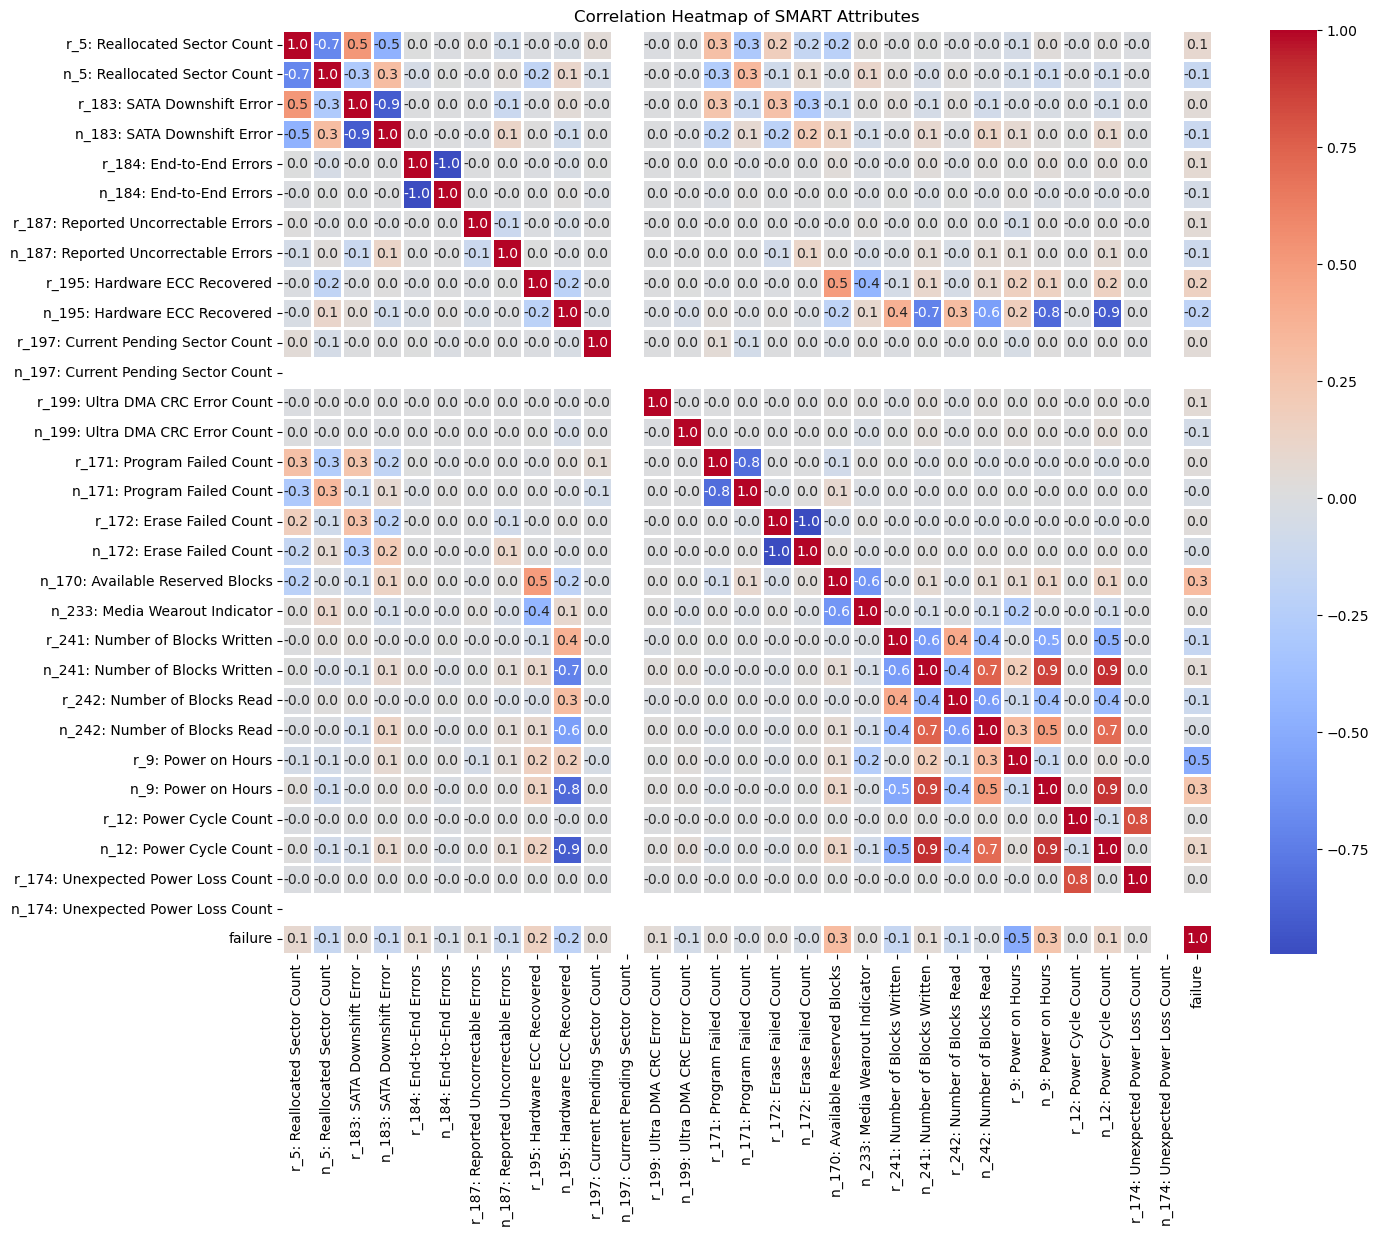

In [12]:
correlation_matrix = df.corr(method='pearson')

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True, linewidths=1, fmt='.1f')
plt.title("Correlation Heatmap of SMART Attributes")
plt.show()

In [13]:
print(df['n_197: Current Pending Sector Count'].value_counts()) 
print(df['n_174: Unexpected Power Loss Count'].value_counts())  

n_197: Current Pending Sector Count
100.0    4999
Name: count, dtype: int64
n_174: Unexpected Power Loss Count
100.0    4999
Name: count, dtype: int64


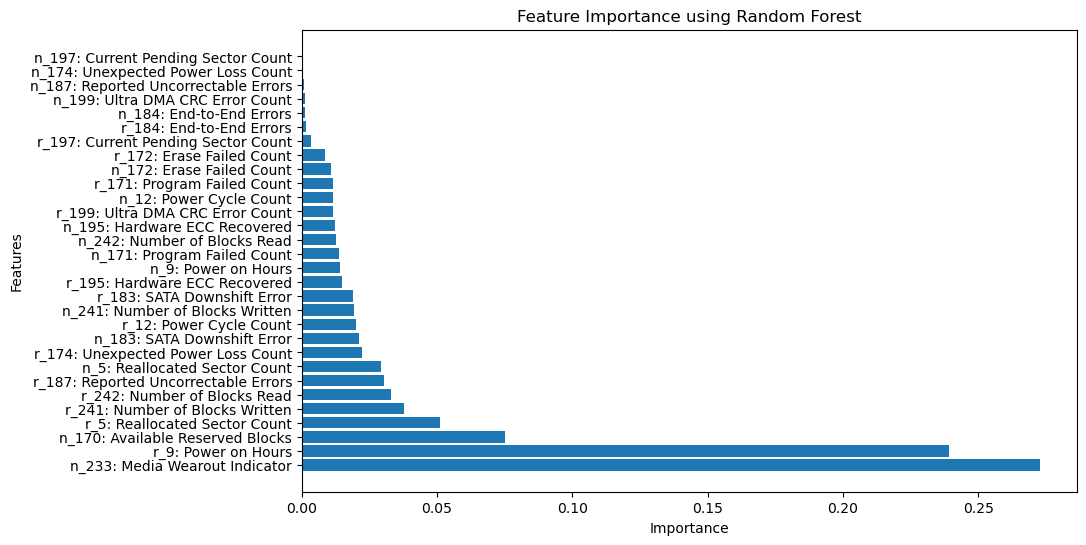

n_233: Media Wearout Indicator: 0.2728
r_9: Power on Hours: 0.2390
n_170: Available Reserved Blocks: 0.0752
r_5: Reallocated Sector Count: 0.0509
r_241: Number of Blocks Written: 0.0379
r_242: Number of Blocks Read: 0.0330
r_187: Reported Uncorrectable Errors: 0.0305
n_5: Reallocated Sector Count: 0.0293
r_174: Unexpected Power Loss Count: 0.0222
n_183: SATA Downshift Error: 0.0213
r_12: Power Cycle Count: 0.0200
n_241: Number of Blocks Written: 0.0194
r_183: SATA Downshift Error: 0.0188
r_195: Hardware ECC Recovered: 0.0149
n_9: Power on Hours: 0.0140
n_171: Program Failed Count: 0.0137
n_242: Number of Blocks Read: 0.0127
n_195: Hardware ECC Recovered: 0.0123
r_199: Ultra DMA CRC Error Count: 0.0115
n_12: Power Cycle Count: 0.0115
r_171: Program Failed Count: 0.0115
n_172: Erase Failed Count: 0.0107
r_172: Erase Failed Count: 0.0088
r_197: Current Pending Sector Count: 0.0035
r_184: End-to-End Errors: 0.0016
n_184: End-to-End Errors: 0.0011
n_199: Ultra DMA CRC Error Count: 0.0011
n_

In [14]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X = df.drop(columns=['failure'])
y = df['failure']

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

feature_importances = rf_model.feature_importances_

features = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance using Random Forest")
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align="center")
plt.yticks(range(len(sorted_indices)), features[sorted_indices])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

for feature, importance in zip(features[sorted_indices], feature_importances[sorted_indices]):
    print(f"{feature}: {importance:.4f}")


## Section 1: Predicting disk failure time

In [15]:
failed_disks = df[df['failure'] == 1]

In [16]:
features = [col for col in failed_disks.columns if col not in ['r_9: Power on Hours', 
                                                              'n_9: Power on Hours', 
                                                              'failure']]

In [17]:
X = failed_disks[features]
y = failed_disks['r_9: Power on Hours']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
threshold = 0.5
y_train_classes = np.where(y_train > threshold, 1, 0)

# Now apply SMOTE
smote = SMOTE(random_state=42)
X_train_re, y_train_re = smote.fit_resample(X_train, y_train_classes)

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [23]:
metrics = {
    'R2 Score (Train)': r2_score(y_train, y_pred_train),
    'R2 Score (Test)': r2_score(y_test, y_pred_test),
    'RMSE (Train)': np.sqrt(mean_squared_error(y_train, y_pred_train)),
    'RMSE (Test)': np.sqrt(mean_squared_error(y_test, y_pred_test)),
    'MAE (Train)': mean_absolute_error(y_train, y_pred_train),
    'MAE (Test)': mean_absolute_error(y_test, y_pred_test),
    'Explained Variance Score (Train)': explained_variance_score(y_train, y_pred_train),
    'Explained Variance Score (Test)': explained_variance_score(y_test, y_pred_test)
}

print("Model Performance Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

Model Performance Metrics:
R2 Score (Train): 0.7325
R2 Score (Test): -41910392858873000552824832.0000
RMSE (Train): 0.0935
RMSE (Test): 1247289347702.2026
MAE (Train): 0.0616
MAE (Test): 88196675586.2644
Explained Variance Score (Train): 0.7325
Explained Variance Score (Test): -41700840894578625714585600.0000


In [24]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(model.coef_)
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


Top 10 Most Important Features:
                                 feature    importance
25               n_12: Power Cycle Count  7.281853e+12
21       n_241: Number of Blocks Written  4.064205e+12
9          n_195: Hardware ECC Recovered  3.822263e+12
11   n_197: Current Pending Sector Count  8.826716e+11
7   n_187: Reported Uncorrectable Errors  1.186103e+10
4               r_184: End-to-End Errors  4.292959e+09
5               n_184: End-to-End Errors  4.265686e+09
26    r_174: Unexpected Power Loss Count  1.481123e-01
24               r_12: Power Cycle Count  1.394530e-01
18      n_170: Available Reserved Blocks  1.190840e-01


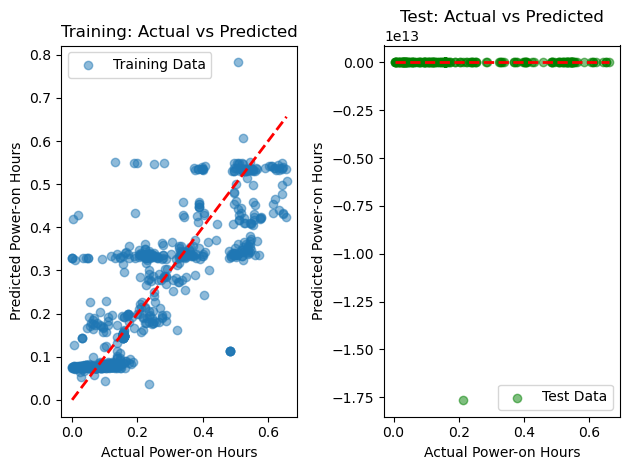

In [25]:
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Training Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Power-on Hours')
plt.ylabel('Predicted Power-on Hours')
plt.title('Training: Actual vs Predicted')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5, color='green', label='Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Power-on Hours')
plt.ylabel('Predicted Power-on Hours')
plt.title('Test: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

In [26]:
train_accuracy = model.score(X_train_scaled, y_train) * 100
test_accuracy = model.score(X_test_scaled, y_test) * 100

print(f"\nTraining Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")


Training Accuracy: 73.25%
Test Accuracy: -4191039285887299952203268096.00%


In [27]:
from sklearn.feature_selection import SelectKBest, f_regression

In [28]:
selector = SelectKBest(score_func=f_regression, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

In [29]:
model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train)

LinearRegression()

In [30]:
y_pred_train_selected = model_selected.predict(X_train_selected)
y_pred_test_selected = model_selected.predict(X_test_selected)

In [31]:
metrics = {
    'R2 Score (Train)': r2_score(y_train, y_pred_train_selected),
    'R2 Score (Test)': r2_score(y_test, y_pred_test_selected),
    'RMSE (Train)': np.sqrt(mean_squared_error(y_train, y_pred_train_selected)),
    'RMSE (Test)': np.sqrt(mean_squared_error(y_test, y_pred_test_selected)),
    'MAE (Train)': mean_absolute_error(y_train, y_pred_train_selected),
    'MAE (Test)': mean_absolute_error(y_test, y_pred_test_selected),
    'Explained Variance Score (Train)': explained_variance_score(y_train, y_pred_train_selected),
    'Explained Variance Score (Test)': explained_variance_score(y_test, y_pred_test_selected)
}

print("Model Performance Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

Model Performance Metrics:
R2 Score (Train): 0.7089
R2 Score (Test): 0.6744
RMSE (Train): 0.0975
RMSE (Test): 0.1099
MAE (Train): 0.0644
MAE (Test): 0.0708
Explained Variance Score (Train): 0.7089
Explained Variance Score (Test): 0.6746


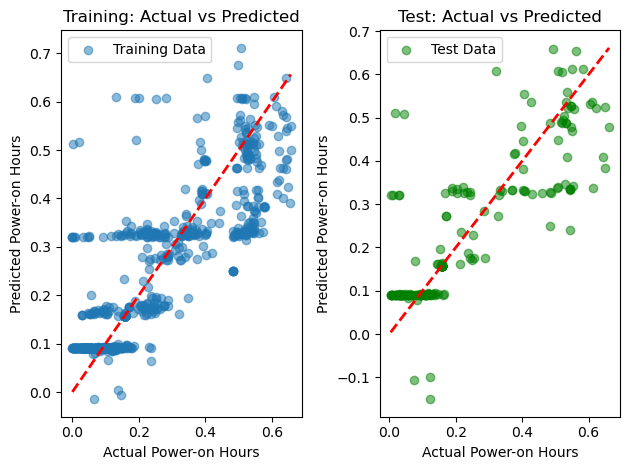

In [32]:
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_selected, alpha=0.5, label='Training Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Power-on Hours')
plt.ylabel('Predicted Power-on Hours')
plt.title('Training: Actual vs Predicted')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_selected, alpha=0.5, color='green', label='Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Power-on Hours')
plt.ylabel('Predicted Power-on Hours')
plt.title('Test: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

In [47]:
train_accuracy_selected = model_selected.score(X_train_selected, y_train) * 100
test_accuracy_selected = model_selected.score(X_test_selected, y_test) * 100

print(f"Training Accuracy: {train_accuracy_selected:.2f}%")
print(f"Test Accuracy: {test_accuracy_selected:.2f}%\n")

Training Accuracy: 70.89%
Test Accuracy: 67.44%



In [34]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_train_accuracy = rf_model.score(X_train_scaled, y_train) * 100
rf_test_accuracy = rf_model.score(X_test_scaled, y_test) * 100

In [35]:
y_pred_train_rf = rf_model.predict(X_train_scaled)
y_pred_test_rf = rf_model.predict(X_test_scaled)

In [36]:
metrics_rf = {
    'R2 Score (Train)': r2_score(y_train, y_pred_train_rf),
    'R2 Score (Test)': r2_score(y_test, y_pred_test_rf),
    'RMSE (Train)': np.sqrt(mean_squared_error(y_train, y_pred_train_rf)),
    'RMSE (Test)': np.sqrt(mean_squared_error(y_test, y_pred_test_rf)),
    'MAE (Train)': mean_absolute_error(y_train, y_pred_train_rf),
    'MAE (Test)': mean_absolute_error(y_test, y_pred_test_rf),
    'Explained Variance Score (Train)': explained_variance_score(y_train, y_pred_train_rf),
    'Explained Variance Score (Test)': explained_variance_score(y_test, y_pred_test_rf)
}

print("RandomForestRegressor Model Performance Metrics:")
for metric, value in metrics_rf.items():
    print(f"{metric}: {value:.4f}")

RandomForestRegressor Model Performance Metrics:
R2 Score (Train): 0.9646
R2 Score (Test): 0.9129
RMSE (Train): 0.0340
RMSE (Test): 0.0569
MAE (Train): 0.0185
MAE (Test): 0.0367
Explained Variance Score (Train): 0.9646
Explained Variance Score (Test): 0.9132


In [37]:
feature_importance_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance_rf = feature_importance_rf.sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance_rf.head(10))


Top 10 Most Important Features:
                                feature  importance
19       n_233: Media Wearout Indicator    0.568353
8         r_195: Hardware ECC Recovered    0.164022
9         n_195: Hardware ECC Recovered    0.052065
22         r_242: Number of Blocks Read    0.041944
20      r_241: Number of Blocks Written    0.035839
24              r_12: Power Cycle Count    0.026849
26   r_174: Unexpected Power Loss Count    0.023501
2           r_183: SATA Downshift Error    0.020760
1         n_5: Reallocated Sector Count    0.016856
10  r_197: Current Pending Sector Count    0.011084


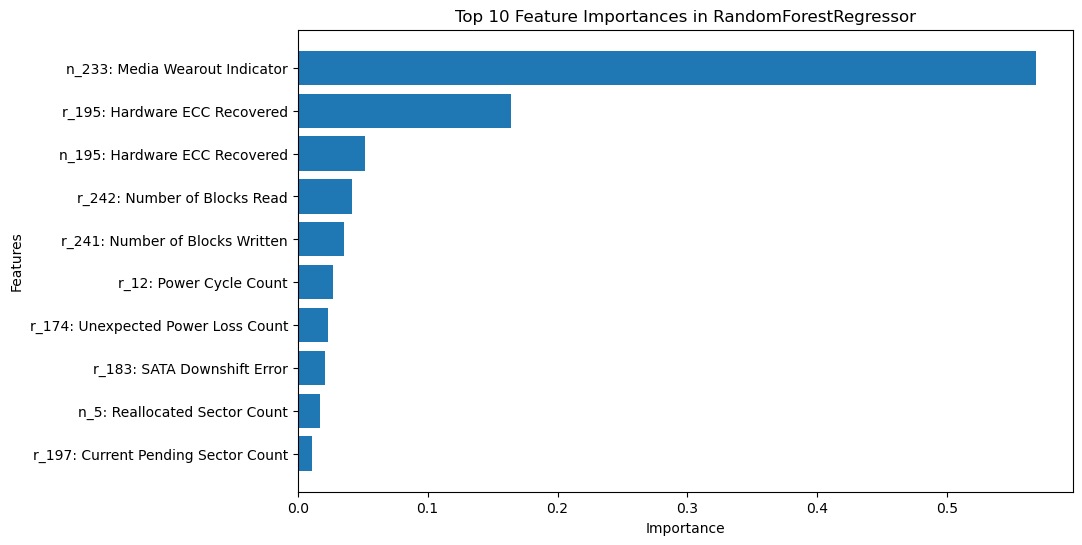

In [38]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_rf['feature'].head(10), feature_importance_rf['importance'].head(10))
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances in RandomForestRegressor')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

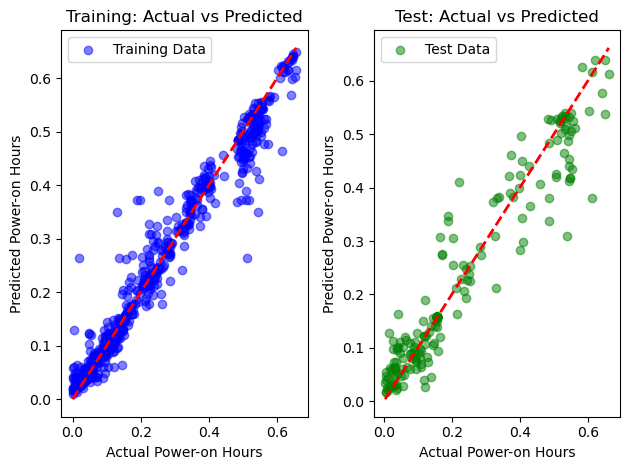

In [39]:
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_rf, alpha=0.5, label='Training Data', color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Power-on Hours')
plt.ylabel('Predicted Power-on Hours')
plt.title('Training: Actual vs Predicted')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_rf, alpha=0.5, color='green', label='Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Power-on Hours')
plt.ylabel('Predicted Power-on Hours')
plt.title('Test: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

In [40]:
print(f"Training Accuracy: {rf_train_accuracy:.2f}%")
print(f"Test Accuracy: {rf_test_accuracy:.2f}%\n")

Training Accuracy: 96.46%
Test Accuracy: 91.29%



In [41]:
# SVR
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
svr_train_accuracy = svr_model.score(X_train_scaled, y_train) * 100
svr_test_accuracy = svr_model.score(X_test_scaled, y_test) * 100

In [42]:
y_pred_train_svr = svr_model.predict(X_train_scaled)
y_pred_test_svr = svr_model.predict(X_test_scaled)

In [43]:
metrics_rf = {
    'R2 Score (Train)': r2_score(y_train, y_pred_train_svr),
    'R2 Score (Test)': r2_score(y_test, y_pred_test_svr),
    'RMSE (Train)': np.sqrt(mean_squared_error(y_train, y_pred_train_svr)),
    'RMSE (Test)': np.sqrt(mean_squared_error(y_test, y_pred_test_svr)),
    'MAE (Train)': mean_absolute_error(y_train, y_pred_train_svr),
    'MAE (Test)': mean_absolute_error(y_test, y_pred_test_svr),
    'Explained Variance Score (Train)': explained_variance_score(y_train, y_pred_train_svr),
    'Explained Variance Score (Test)': explained_variance_score(y_test, y_pred_test_svr)
}

print("RandomForestRegressor Model Performance Metrics:")
for metric, value in metrics_rf.items():
    print(f"{metric}: {value:.4f}")

RandomForestRegressor Model Performance Metrics:
R2 Score (Train): 0.7966
R2 Score (Test): 0.7609
RMSE (Train): 0.0815
RMSE (Test): 0.0942
MAE (Train): 0.0574
MAE (Test): 0.0652
Explained Variance Score (Train): 0.7992
Explained Variance Score (Test): 0.7653


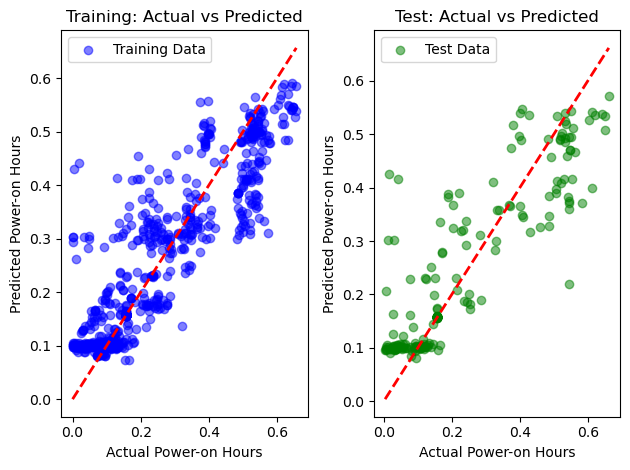

In [44]:
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_svr, alpha=0.5, label='Training Data', color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Power-on Hours')
plt.ylabel('Predicted Power-on Hours')
plt.title('Training: Actual vs Predicted')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_svr, alpha=0.5, color='green', label='Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Power-on Hours')
plt.ylabel('Predicted Power-on Hours')
plt.title('Test: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

In [46]:
print(f"Training Accuracy: {svr_train_accuracy:.2f}%")
print(f"Test Accuracy: {svr_test_accuracy:.2f}%\n")


Training Accuracy: 79.66%
Test Accuracy: 76.09%



In [48]:
# XGBoost
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=50, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_train_accuracy = xgb_model.score(X_train_scaled, y_train) * 100
xgb_test_accuracy = xgb_model.score(X_test_scaled, y_test) * 100


In [49]:
y_pred_train_xgb = xgb_model.predict(X_train_scaled)
y_pred_test_xgb = xgb_model.predict(X_test_scaled)

In [50]:
metrics_rf = {
    'R2 Score (Train)': r2_score(y_train, y_pred_train_xgb),
    'R2 Score (Test)': r2_score(y_test, y_pred_test_xgb),
    'RMSE (Train)': np.sqrt(mean_squared_error(y_train, y_pred_train_xgb)),
    'RMSE (Test)': np.sqrt(mean_squared_error(y_test, y_pred_test_xgb)),
    'MAE (Train)': mean_absolute_error(y_train, y_pred_train_xgb),
    'MAE (Test)': mean_absolute_error(y_test, y_pred_test_xgb),
    'Explained Variance Score (Train)': explained_variance_score(y_train, y_pred_train_xgb),
    'Explained Variance Score (Test)': explained_variance_score(y_test, y_pred_test_xgb)
}

print("RandomForestRegressor Model Performance Metrics:")
for metric, value in metrics_rf.items():
    print(f"{metric}: {value:.4f}")

RandomForestRegressor Model Performance Metrics:
R2 Score (Train): 0.9770
R2 Score (Test): 0.8966
RMSE (Train): 0.0274
RMSE (Test): 0.0620
MAE (Train): 0.0135
MAE (Test): 0.0388
Explained Variance Score (Train): 0.9770
Explained Variance Score (Test): 0.8966


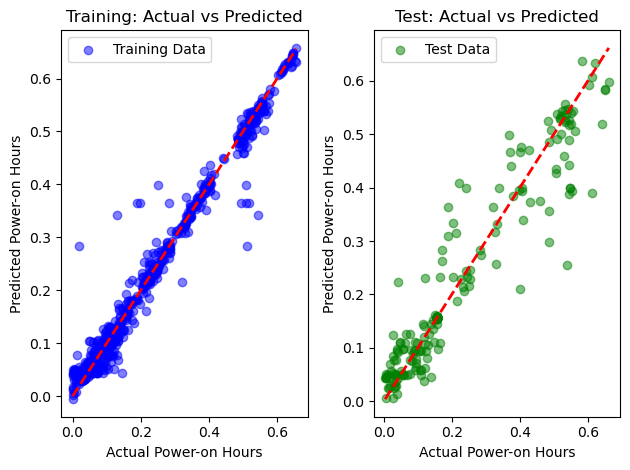

In [51]:
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_xgb, alpha=0.5, label='Training Data', color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Power-on Hours')
plt.ylabel('Predicted Power-on Hours')
plt.title('Training: Actual vs Predicted')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_xgb, alpha=0.5, color='green', label='Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Power-on Hours')
plt.ylabel('Predicted Power-on Hours')
plt.title('Test: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

In [39]:

print("XGBoost Metrics:")
print(f"Training Accuracy: {xgb_train_accuracy:.2f}%")
print(f"Test Accuracy: {xgb_test_accuracy:.2f}%\n")

XGBoost Metrics:
Training Accuracy: 97.70%
Test Accuracy: 89.66%



In [40]:
# Add polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train model
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Calculate accuracies
train_accuracy_poly = model_poly.score(X_train_poly, y_train) * 100
test_accuracy_poly = model_poly.score(X_test_poly, y_test) * 100

print("Polynomial Features Metrics:")
print(f"Training Accuracy: {train_accuracy_poly:.2f}%")
print(f"Test Accuracy: {test_accuracy_poly:.2f}%\n")


Polynomial Features Metrics:
Training Accuracy: 92.07%
Test Accuracy: -9124194544656630738321408.00%



In [41]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Filter the DataFrame for failed disks
failed_disks = df[df['failure'] == 1]
features = [col for col in failed_disks.columns if col not in ['r_9: Power on Hours', 'n_9: Power on Hours', 'failure']]
X = failed_disks[features]
y = failed_disks['r_9: Power on Hours']

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_
features = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance using Random Forest")
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align="center")
plt.yticks(range(len(sorted_indices)), features[sorted_indices])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Print feature importances
for feature, importance in zip(features[sorted_indices], feature_importances[sorted_indices]):
    print(f"{feature}: {importance:.4f}")

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [26]:
def predict_failure(disk):
    X_new = np.array([[disk['r_195: Hardware ECC Recovered'], 
                       disk['n_195: Hardware ECC Recovered'], 
                       disk['n_170: Available Reserved Blocks'], 
                       disk['r_9: Power on Hours'], 
                       disk['n_9: Power on Hours']]])
    
    pred = model.predict(X_new)
    return pred[0]

sample_disk = {
    'r_195: Hardware ECC Recovered': 0.5,
    'n_195: Hardware ECC Recovered': 0.8,
    'n_170: Available Reserved Blocks': 100,
    'r_9: Power on Hours': 5000,
    'n_9: Power on Hours': 4800
}

In [27]:
predicted_failure = predict_failure(sample_disk)
print(f"The predicted values: {predicted_failure}")

The predicted values: [5000.         -139.95881072]


/home/andre/miniconda3/envs/storage-venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Section 2: Calculating threshold values ​​for various SMART features

## Section 3: Abnormality detection

## Section 4: Correlation between Smart Features